In [1]:
import numpy as np    # casting the polygons into np.arrays allows to transpose them easily with the .T function
import matplotlib.pyplot as plt    # to plot the counties

In [2]:
%run get_data.ipynb
print("All data is ready!")

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!
Saved seemingly flawless covid19 data.
All data is ready!


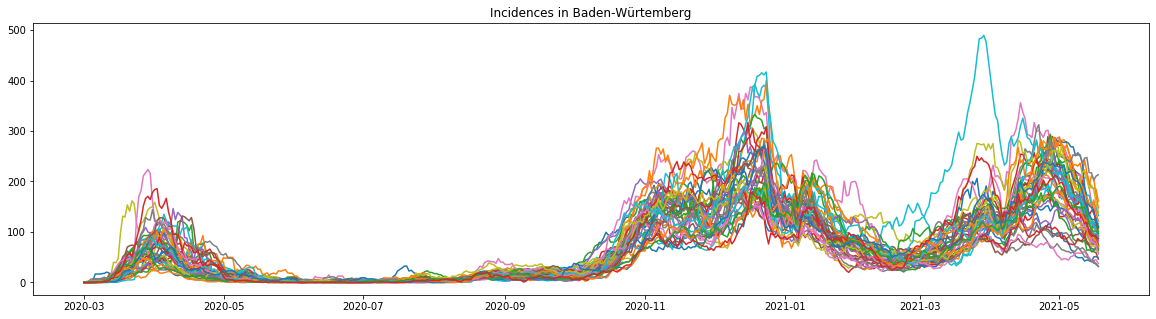

In [3]:
plt.figure(figsize=(20, 5))    # enlarge plot
plt.title("Incidences in Baden-Würtemberg")
for AdmUnitID, county in covid19.items():
    if AdmUnitID[0] == "8":
        plt.plot(non_county_specific_data['UTC'], county['incidences'])
plt.show()

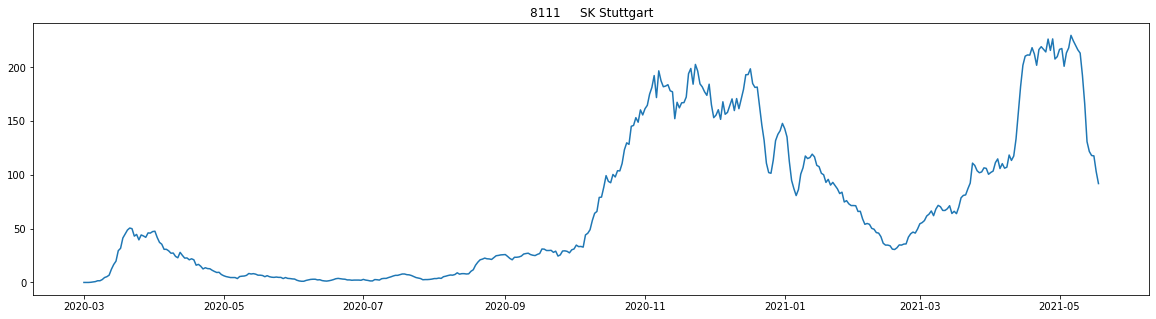

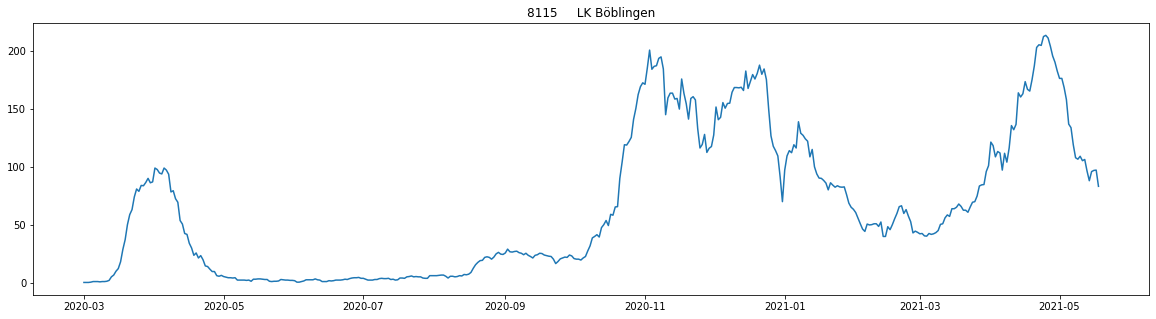

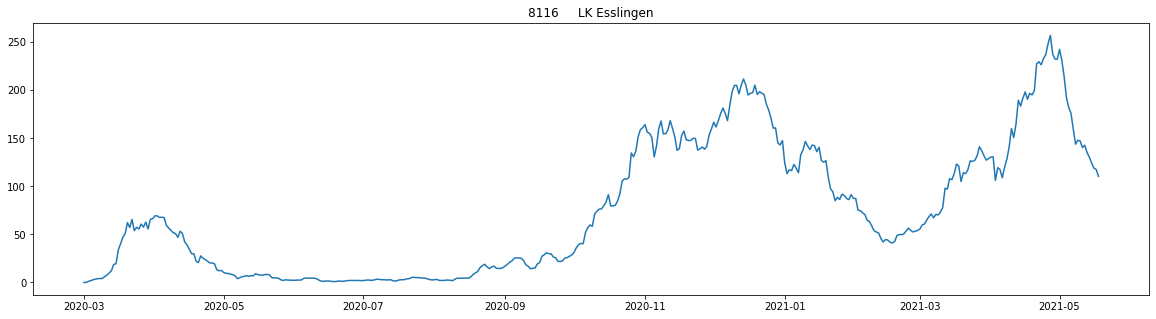

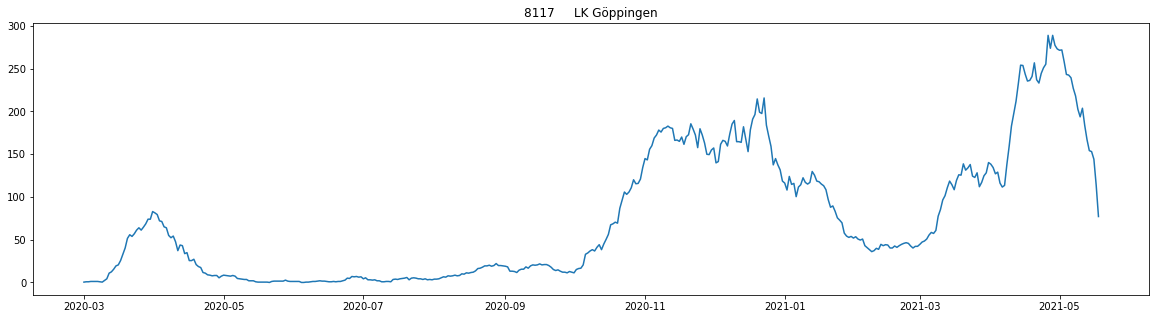

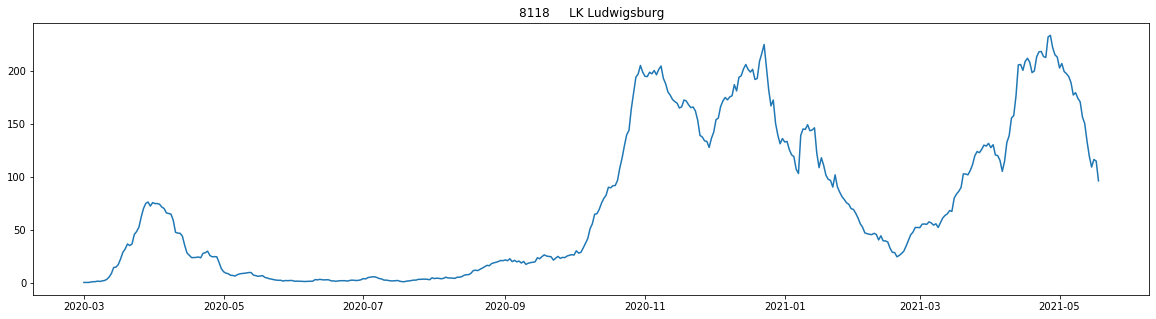

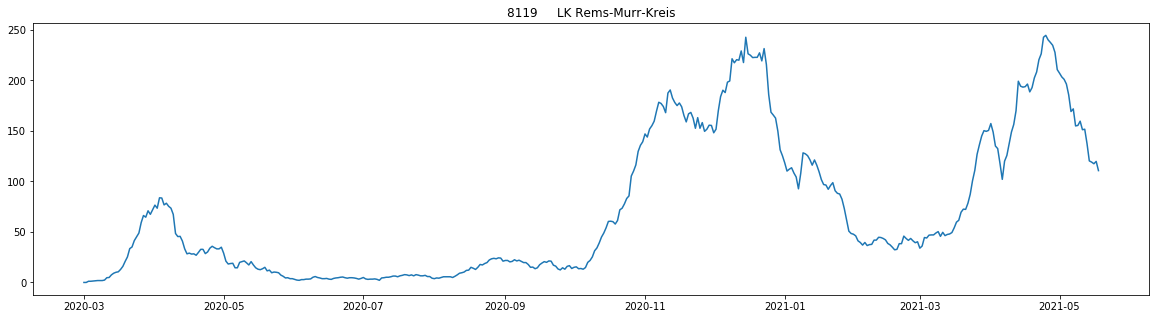

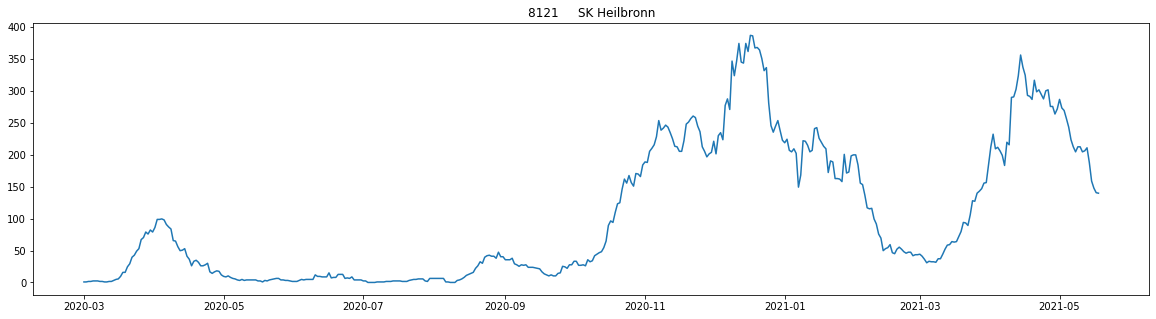

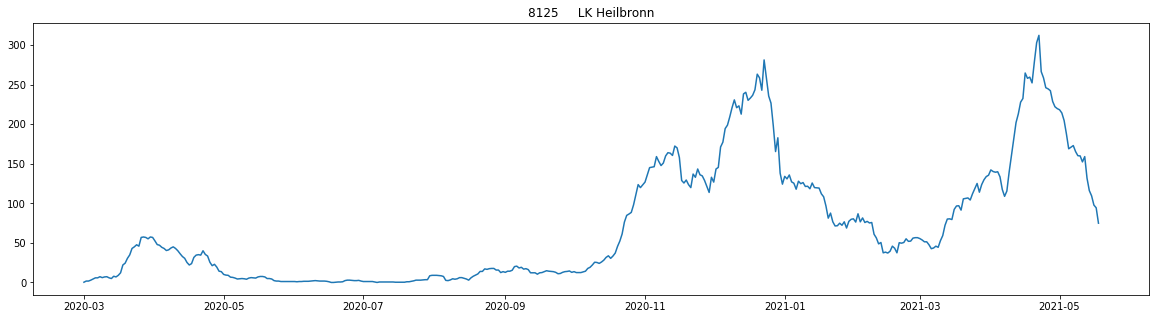

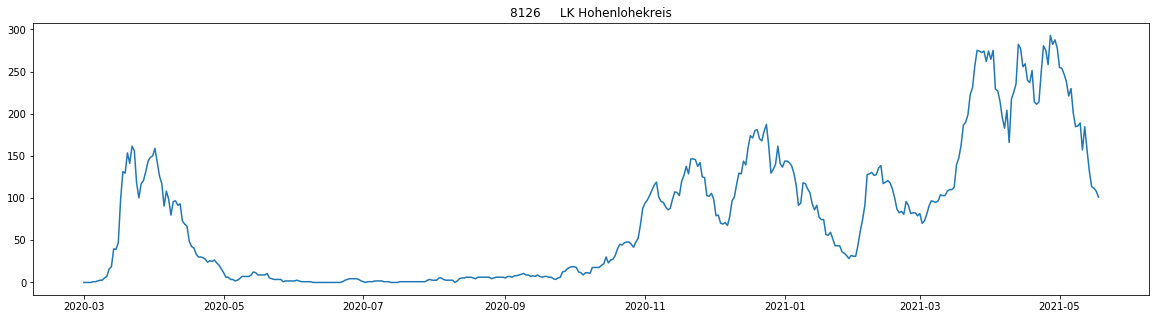

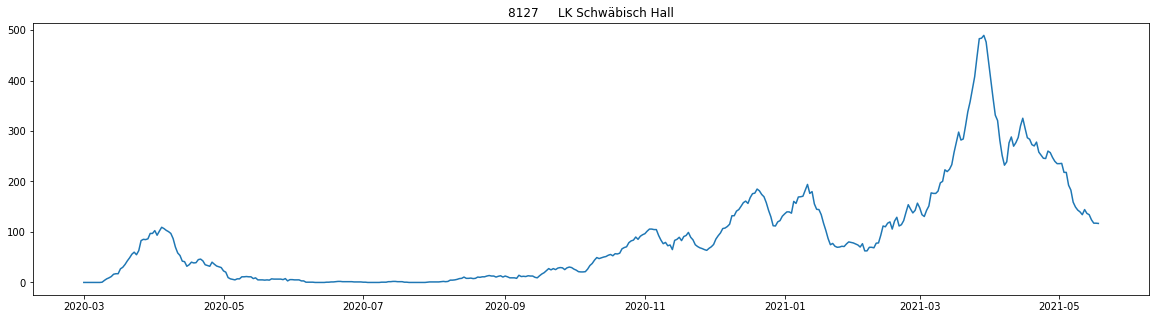

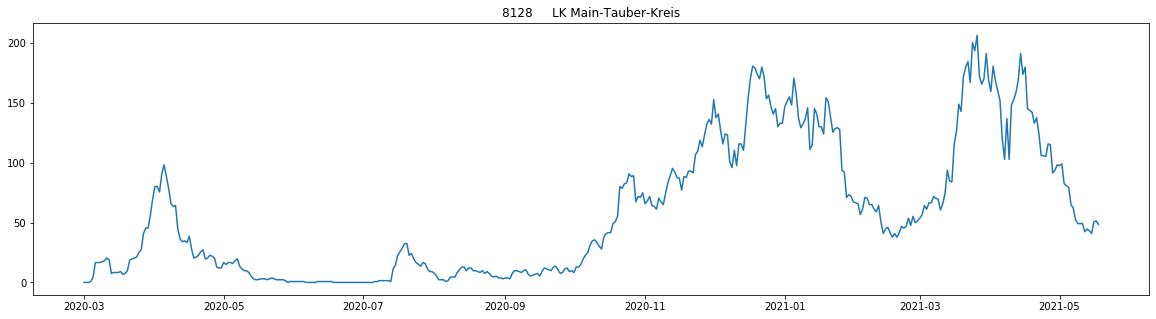

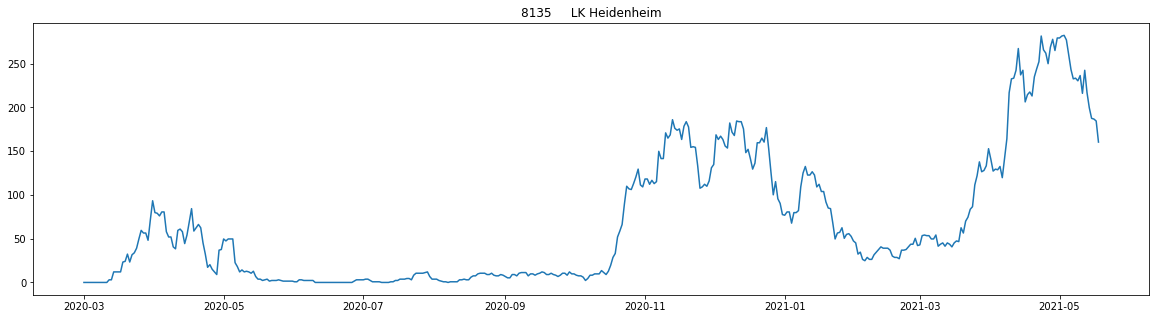

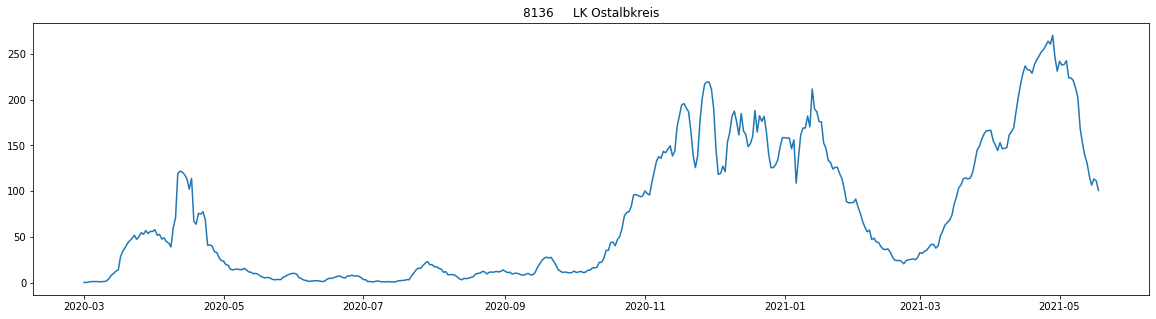

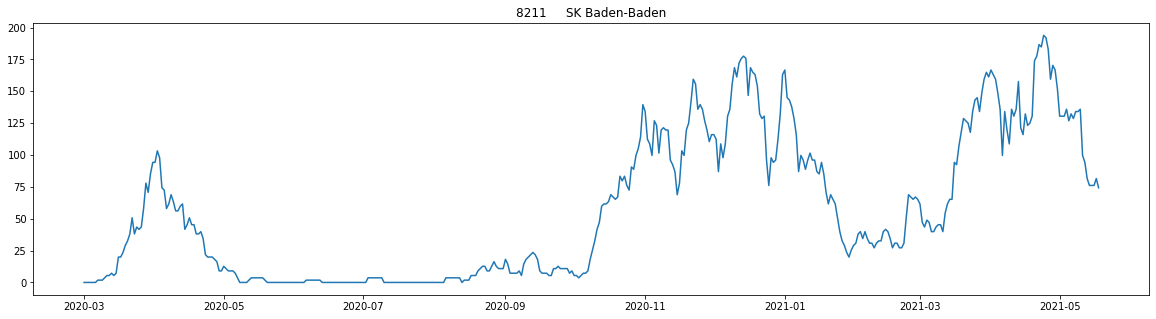

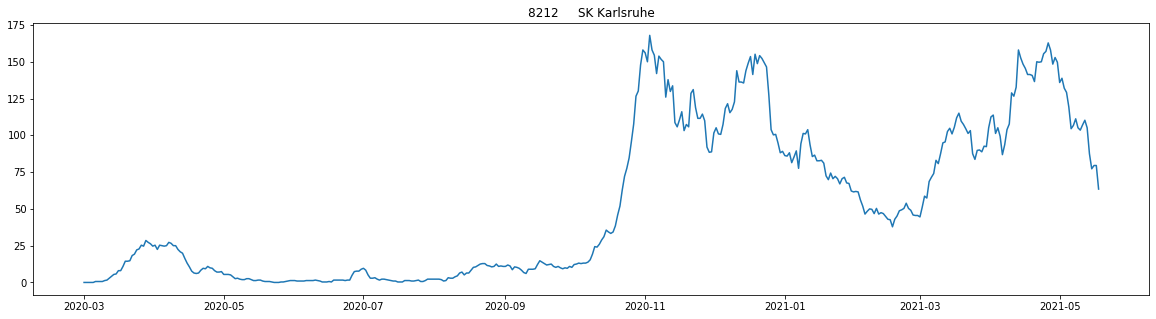

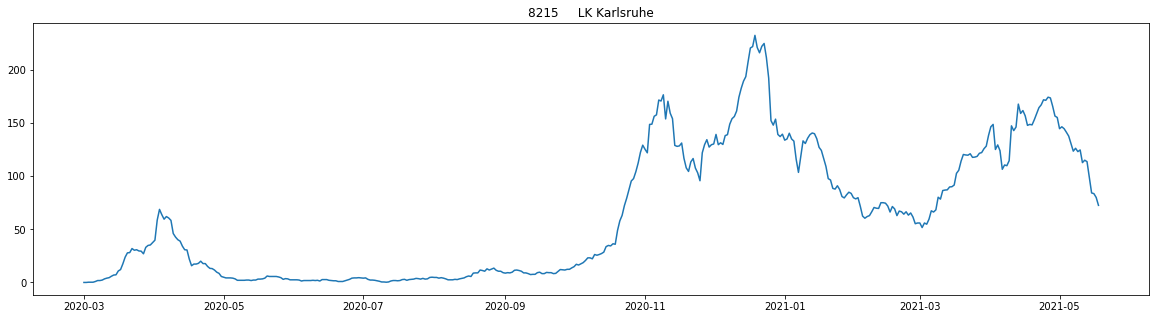

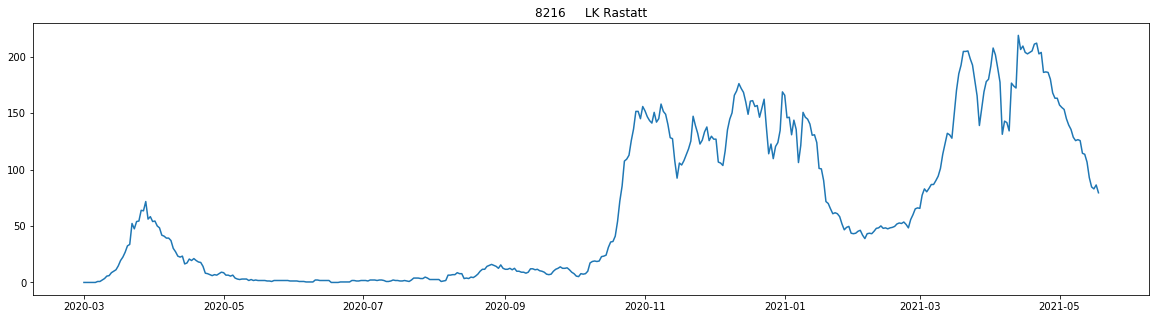

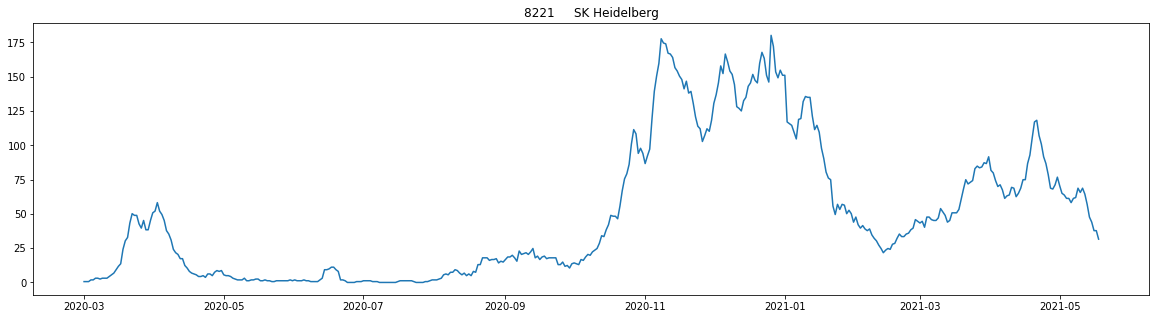

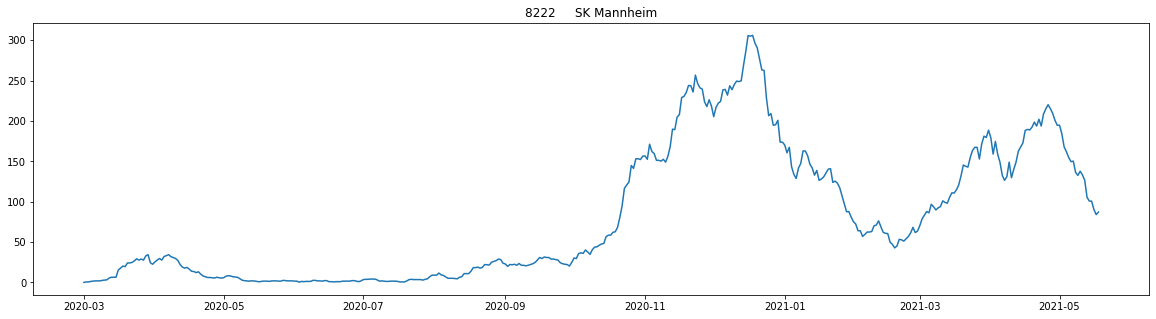

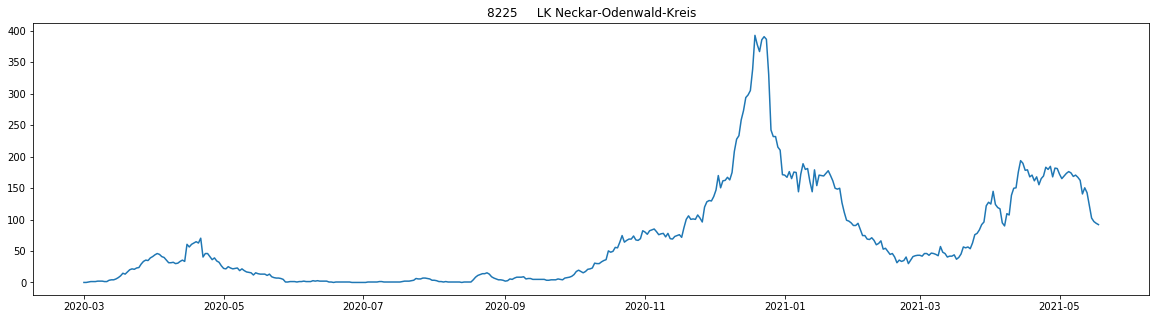

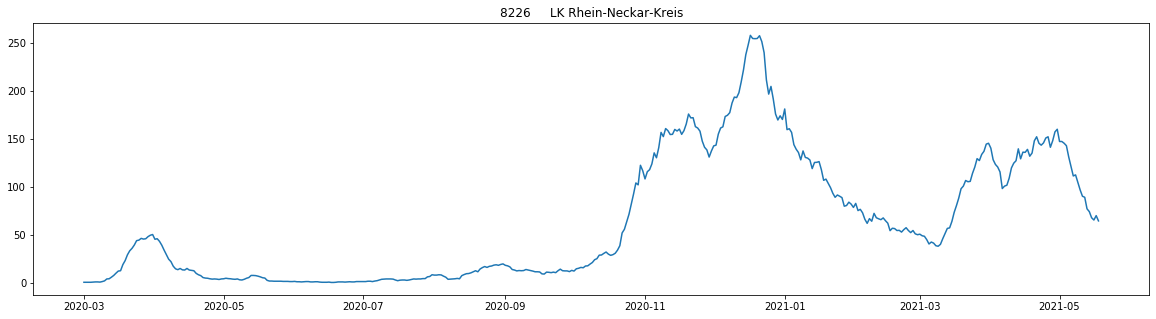

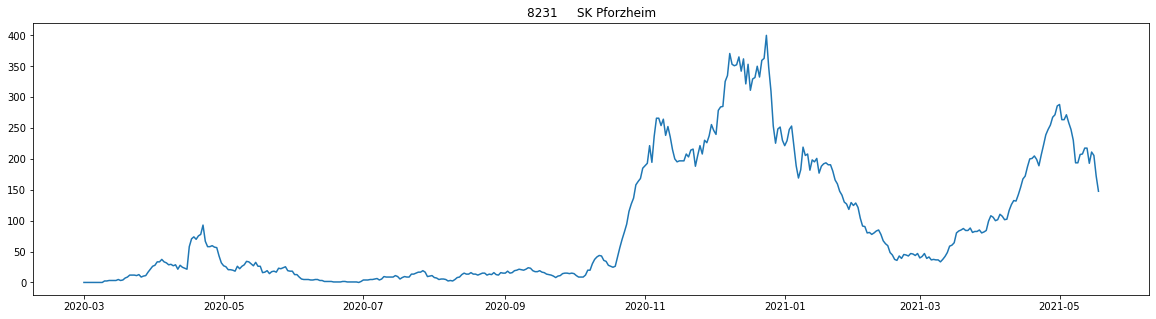

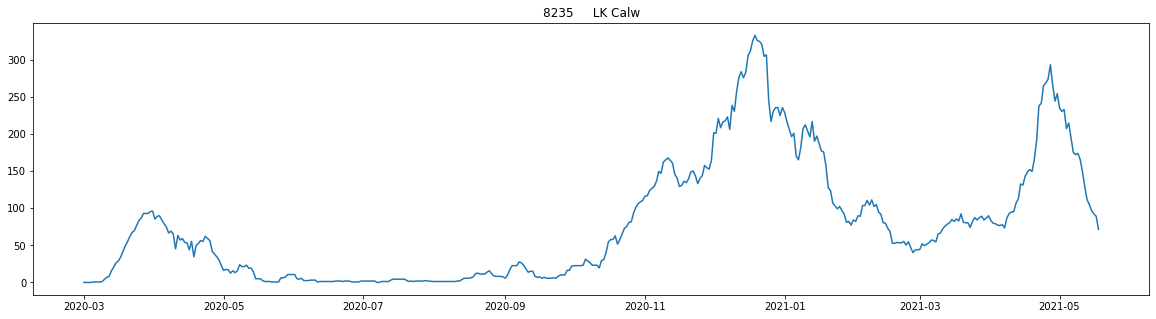

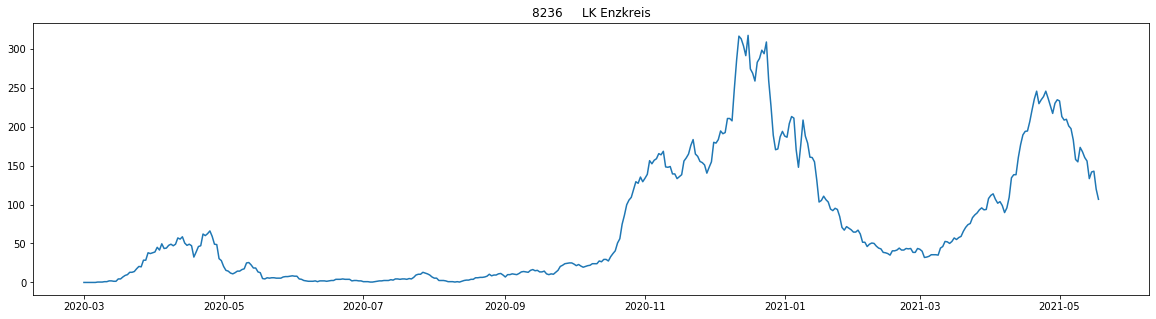

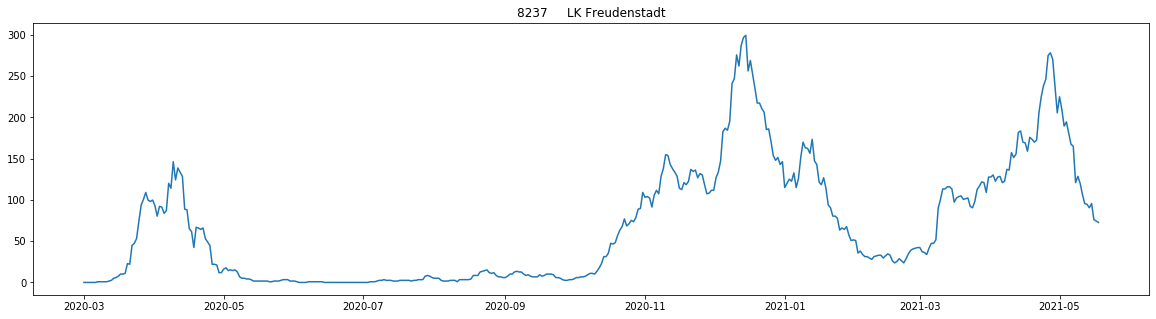

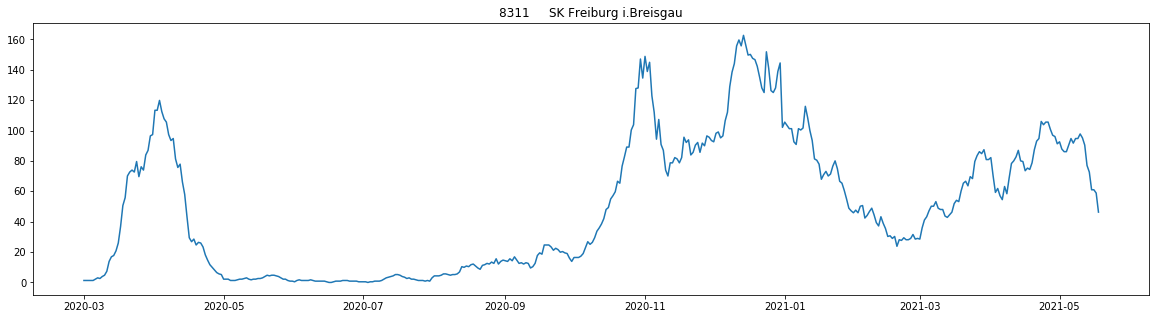

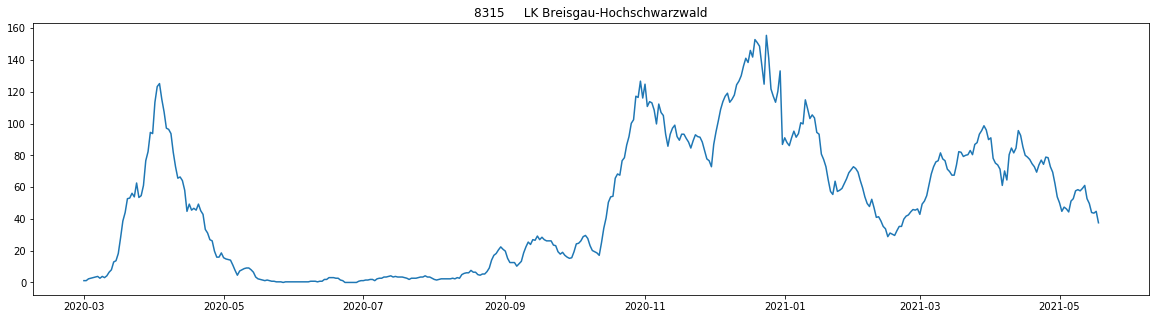

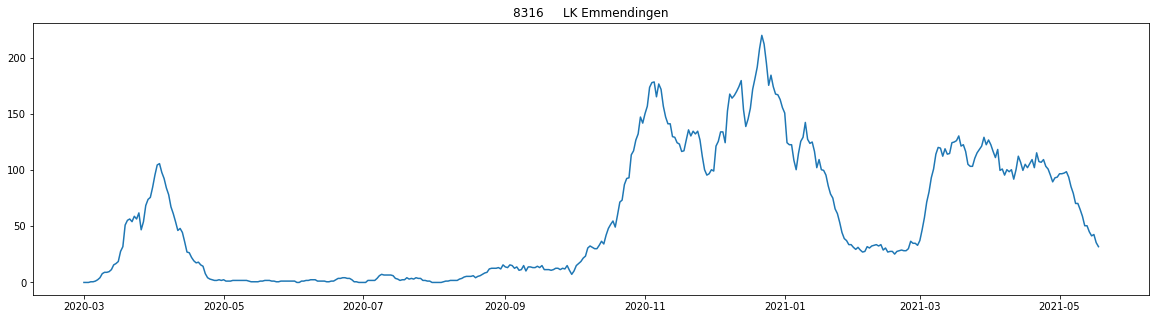

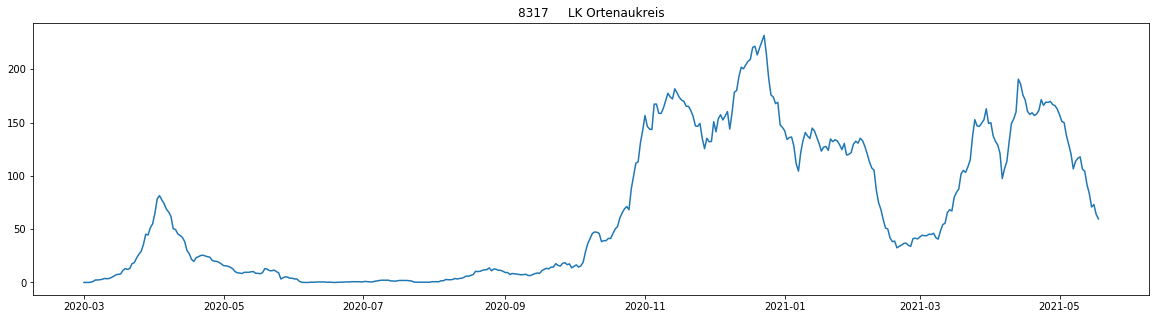

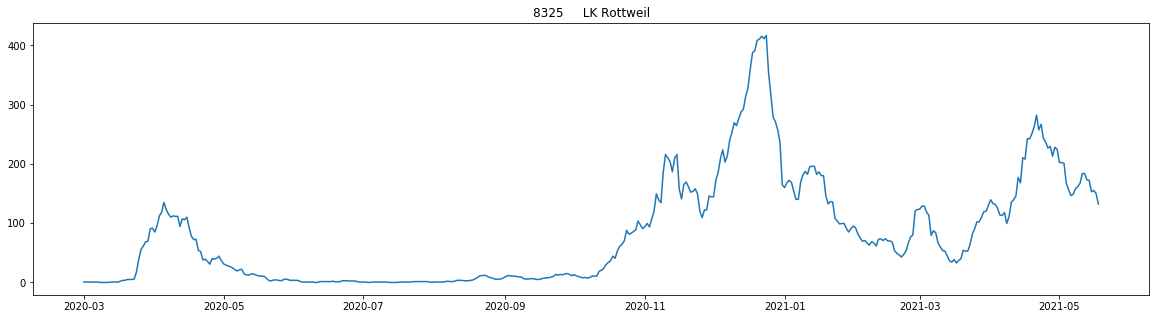

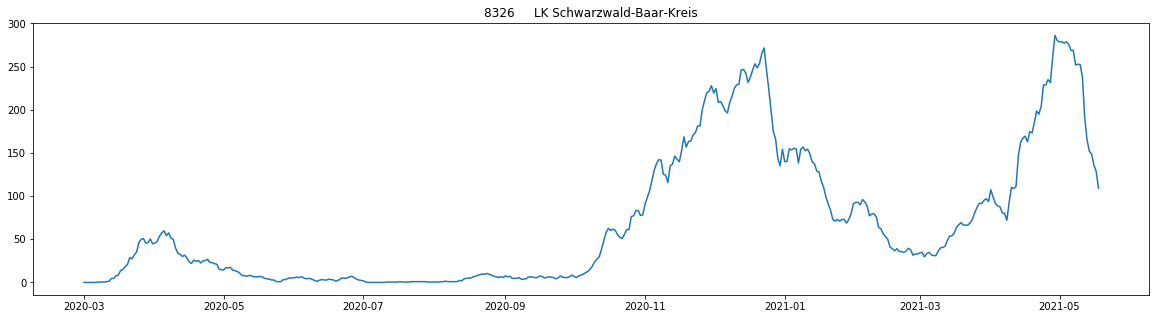

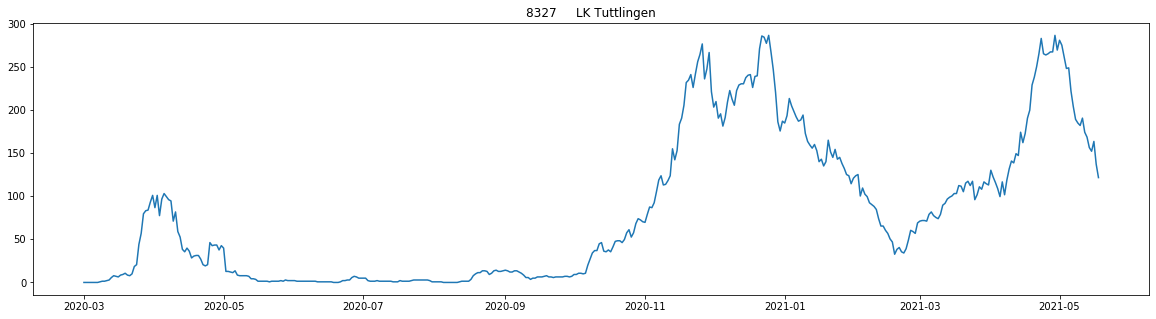

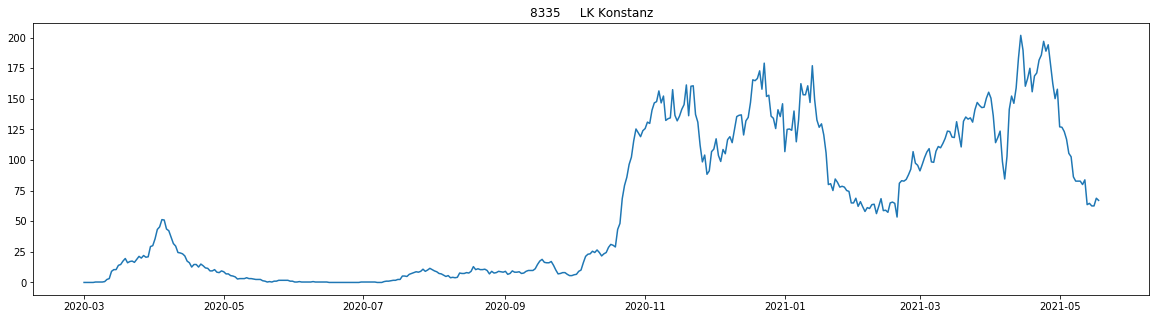

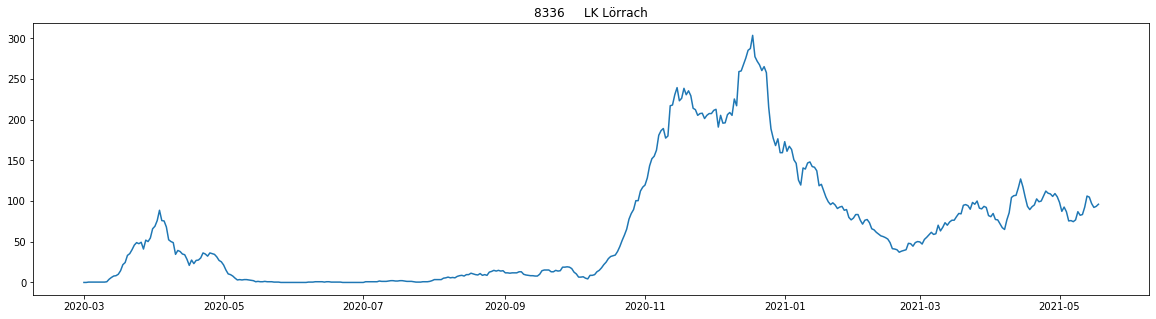

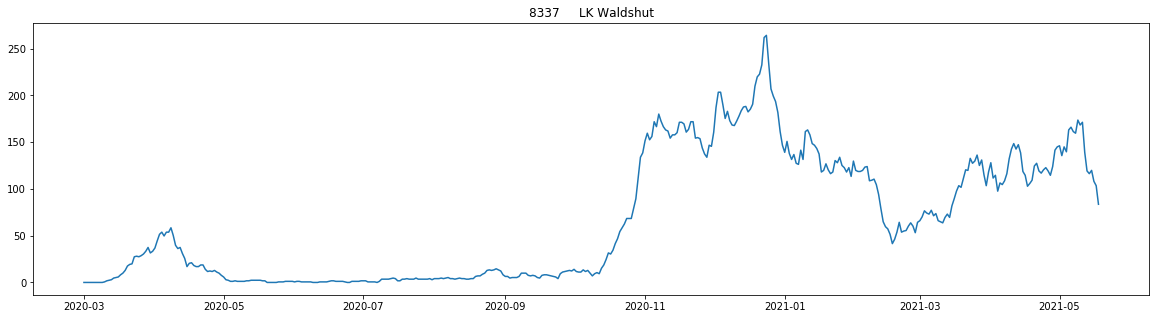

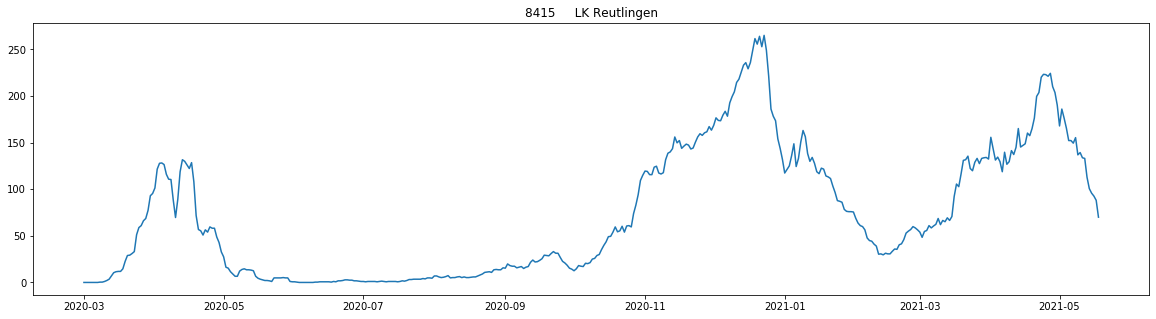

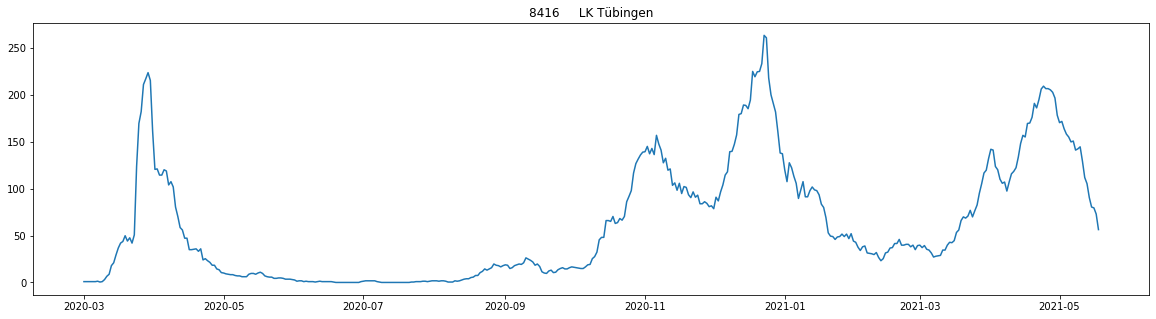

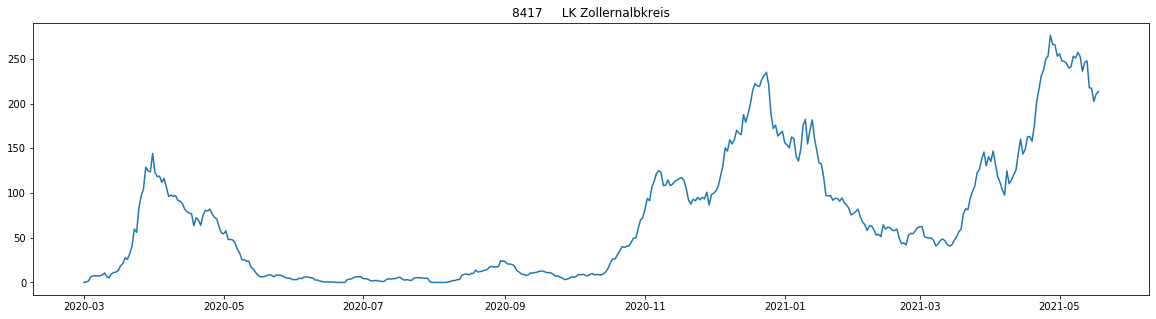

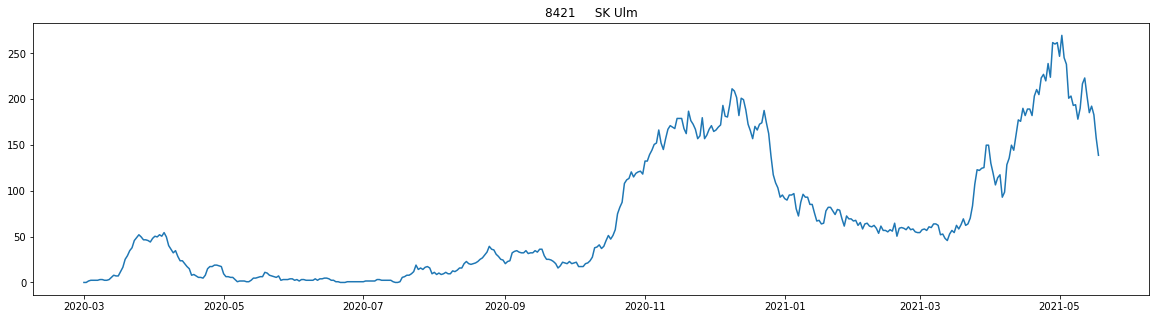

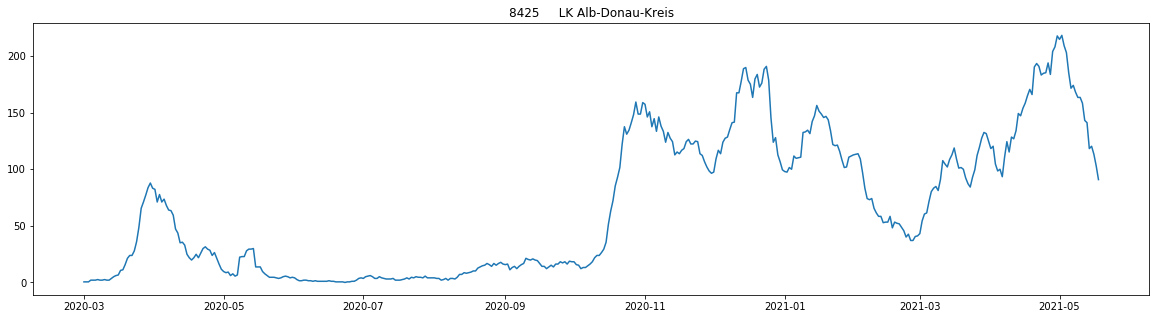

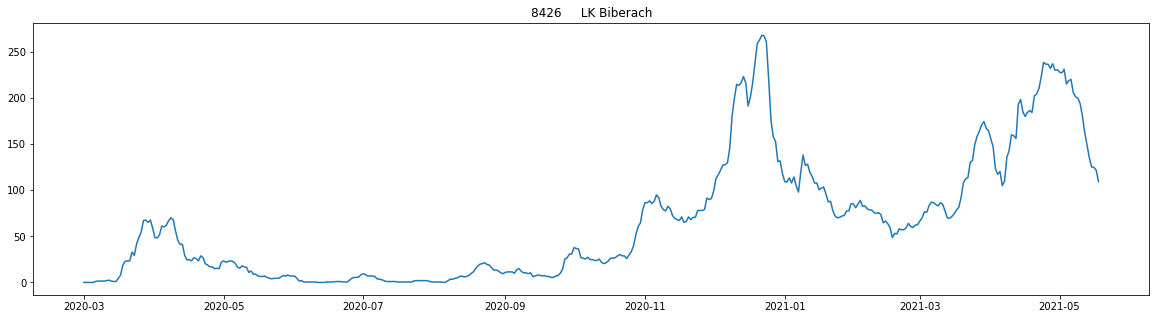

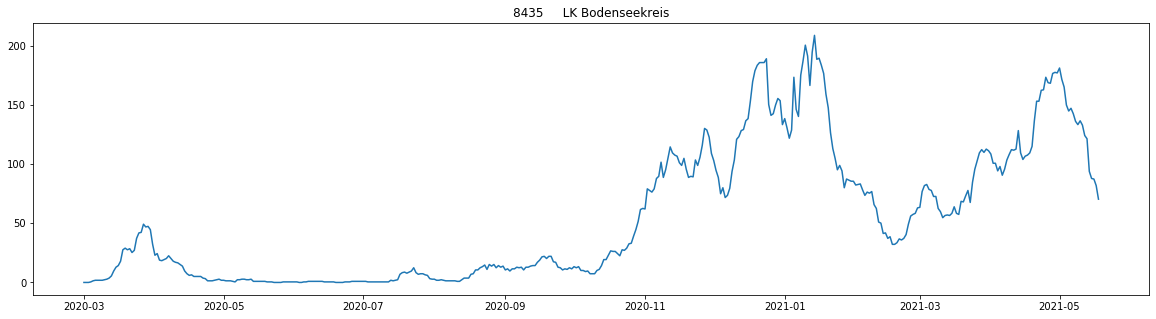

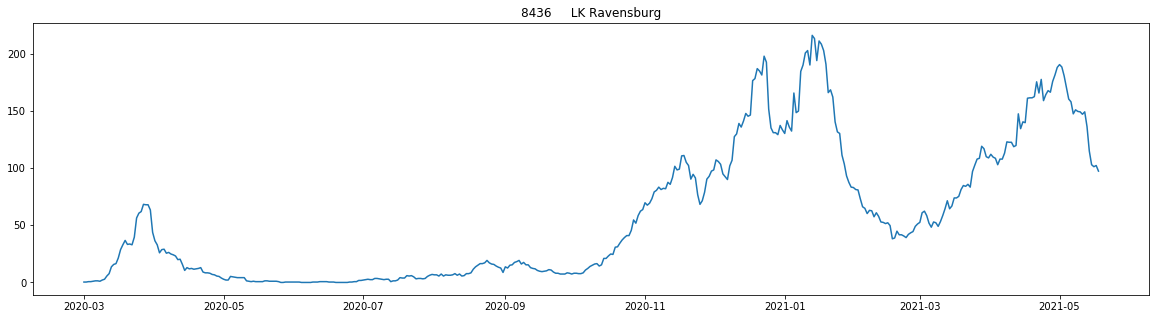

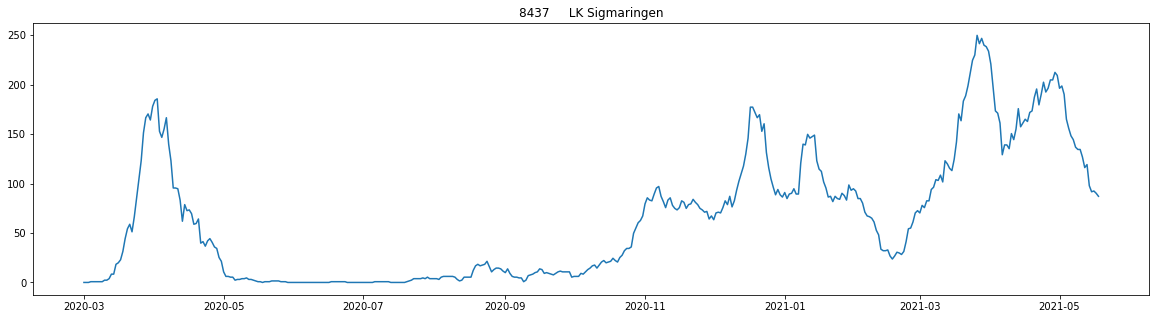

In [4]:
for AdmUnitID, county in covid19.items():
    if AdmUnitID[0] == "8":
        plt.figure(figsize=(20, 5))    # enlarge plot
        plt.plot(non_county_specific_data['UTC'], county['incidences'])
        plt.title(AdmUnitID + "     " + counties_geography[AdmUnitID]['name'])
        plt.show()